**Supplier Segmentation:**
The supplier segmentation is done broadly so as to determine the risk associated with the product purchase. The segmentation also governs the supply chain decisions and the nature of purchase.

The products are classified into 4:
1. Leverage: Products which are low in risk but high in profits/value.
2. Non-critical: Products which are low in risk and low in value. Less attention is required for such products 
3. Strategic: Products which are high in risk and value: These are the differentiating factors and requires a lot of attention
4. Bottle neck: Products which are high in risk and low in value. We try to convert such products into strategic products.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
supplier_data = pd.read_csv("supplier_data.csv")
supplier_data.head()

,supplier,product,availability,no_suppliers,standard,price_fluctuation,Quantity,price
0,supplier1,product_1,0.0,0.5,0.0,0.5,710,360
1,supplier1,product_2,0.0,0.5,0.0,0.5,2997,2740
2,supplier1,product_3,0.0,0.5,0.0,0.5,3917,2919
3,supplier1,product_4,0.0,0.5,0.0,0.5,3827,3246
4,supplier1,product_5,0.0,0.5,0.0,0.0,3882,3596


CALCULATING RISK INDEX

In [3]:
supplier_data['risk_index'] = supplier_data['availability'] + supplier_data['no_suppliers'] + supplier_data['standard'] + supplier_data['price_fluctuation']

In [4]:
supplier_data.head()

,supplier,product,availability,no_suppliers,standard,price_fluctuation,Quantity,price,risk_index
0,supplier1,product_1,0.0,0.5,0.0,0.5,710,360,1.0
1,supplier1,product_2,0.0,0.5,0.0,0.5,2997,2740,1.0
2,supplier1,product_3,0.0,0.5,0.0,0.5,3917,2919,1.0
3,supplier1,product_4,0.0,0.5,0.0,0.5,3827,3246,1.0
4,supplier1,product_5,0.0,0.5,0.0,0.0,3882,3596,0.5


CALCULATING VALUE INDEX

In [5]:
supplier_data["value"] = supplier_data["price"]*supplier_data["Quantity"]

In [6]:
supplier_data.head()

,supplier,product,availability,no_suppliers,standard,price_fluctuation,Quantity,price,risk_index,value
0,supplier1,product_1,0.0,0.5,0.0,0.5,710,360,1.0,255600
1,supplier1,product_2,0.0,0.5,0.0,0.5,2997,2740,1.0,8211780
2,supplier1,product_3,0.0,0.5,0.0,0.5,3917,2919,1.0,11433723
3,supplier1,product_4,0.0,0.5,0.0,0.5,3827,3246,1.0,12422442
4,supplier1,product_5,0.0,0.5,0.0,0.0,3882,3596,0.5,13959672


Comprehending the product value so as to decide threshold values for segmentation

In [7]:
supplier_data["value"].describe()

count    2.400000e+01
mean     5.064812e+06
std      4.847504e+06
min      1.189500e+05
25%      7.975622e+05
50%      3.011452e+06
75%      8.499426e+06
max      1.399081e+07
Name: value, dtype: float64

We see that 50 percentile for value is around 3 million. So we set 3 mn as threshold value.                          
Threshold values:            
Risk_index: 1                     
Product_Value: 3 million

Defining a function for segmentation

In [16]:
def category(r_i, p_v):
  if ((p_v >= 3000000) & (r_i >= 1)):
    return 'Strategic'
  elif ((p_v >= 3000000) & (r_i < 1)):
    return 'Leverage'
  elif ((p_v < 3000000) & (r_i >= 1)):
    return 'Bottleneck'
  elif ((p_v < 3000000) & (r_i < 1)):
    return 'Non-critical'
  else:
    return 'Invalid value'

Generating the category column for each sku

In [17]:
for row in range (supplier_data.shape[0]):
  supplier_data.loc[row, "category"] = category(supplier_data.loc[row, "risk_index"], supplier_data.loc[row, "value"])

In [19]:
supplier_data.head()

,supplier,product,availability,no_suppliers,standard,price_fluctuation,Quantity,price,risk_index,value,category
0,supplier1,product_1,0.0,0.5,0.0,0.5,710,360,1.0,255600,Bottleneck
1,supplier1,product_2,0.0,0.5,0.0,0.5,2997,2740,1.0,8211780,Strategic
2,supplier1,product_3,0.0,0.5,0.0,0.5,3917,2919,1.0,11433723,Strategic
3,supplier1,product_4,0.0,0.5,0.0,0.5,3827,3246,1.0,12422442,Strategic
4,supplier1,product_5,0.0,0.5,0.0,0.0,3882,3596,0.5,13959672,Leverage


In [20]:
supplier_data["category"].value_counts()

Bottleneck      10
Strategic        8
Leverage         4
Non-critical     2
Name: category, dtype: int64

Visualizing the categories

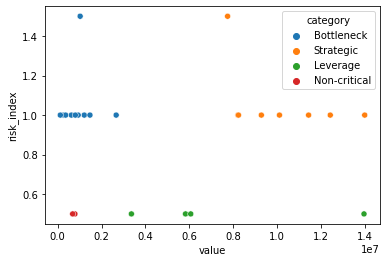

In [23]:
sns.scatterplot(x = "value", y = "risk_index", data = supplier_data, hue = "category")